In [19]:
from tabulate import tabulate
from graphviz import Digraph

def NFA_To_DFA(NFA, start_state, final_states):
    DFA = {}
    states = []

    # create epsilon closure of start state
    closure = Epsilon_Closure([start_state], NFA)


    states.append(closure)
    visited = [closure]


    while len(visited) > 0:
        T = visited.pop(0)

        for a in [0, 1]:
            
            U = Move(T, a, NFA)

            # create epsilon closure of new states
            U_closure = Epsilon_Closure(U, NFA)

            # add U_closure to states, if U_closure not in states
            if U_closure not in states:
                states.append(U_closure)
                visited.append(U_closure)

            if (T, a) not in DFA:
                DFA[(T, a)] = U_closure

    # create DFA 
    DFA_start_state = states.index(Epsilon_Closure([start_state], NFA))   #take first state in epsilon as start state for DFA
    DFA_final_states = []
    for state in states:
        for final_state in final_states:
            if final_state in state:
                DFA_final_states.append(states.index(state))

    return DFA, DFA_start_state, DFA_final_states, states

def Epsilon_Closure(T, NFA):
    # initialize epsilon closure
    closure = set(T)

    # initialize stack with T
    stack = list(T)

    
    while len(stack) > 0:
        state = stack.pop()

        # for each state reached from state by epsilon transition
        for next_state in NFA.get((state, ''), []):
            if next_state not in closure:
                closure.add(next_state)
                stack.append(next_state)

    return frozenset(closure)


def Move(T, a, NFA):
    
    move = set()

    for state in T:
        for next_state in NFA.get((state, a), []):
            move.add(next_state)

    return frozenset(move)


#  NFA that detect all the strings from 0s and 1s such that the 4th symbol from the end is 1
NFA = {
    ('q0', 0): {'q0'},
    ('q0', 1): {'q0', 'q1'},

    ('q1', 0): {'q2'},
    ('q1', 1): {'q2'},

    ('q2', 0): {'q3'},
    ('q2', 1): {'q3'},

    ('q3', 0): {'q4'},
    ('q3', 1): {'q4'}

}

start_state = 'q0'
final_states = ['q4']


DFA, DFA_start_state, DFA_final_states, states = NFA_To_DFA(NFA, start_state, final_states)
print('DFA_start_state : ',states[0])
print('DFA_final_states:', [states[i] for i in DFA_final_states])

# create DFA table
headers = ['State'] + [str(i) for i in range(2)]
table = []
for i, state in enumerate(states):
    row = [i]

print("DFA Transition Table:")
print(tabulate(DFA.items(), headers=['(Current_State, Input_Symbol)', 'Next_State'], tablefmt='grid'))



DFA_start_state :  frozenset({'q0'})
DFA_final_states: [frozenset({'q0', 'q4'}), frozenset({'q0', 'q1', 'q4'}), frozenset({'q0', 'q2', 'q4'}), frozenset({'q0', 'q2', 'q1', 'q4'}), frozenset({'q0', 'q4', 'q3'}), frozenset({'q0', 'q1', 'q4', 'q3'}), frozenset({'q0', 'q2', 'q4', 'q3'}), frozenset({'q4', 'q0', 'q1', 'q2', 'q3'})]
DFA Transition Table:
+------------------------------------------------+-------------------------------------------+
| (Current_State, Input_Symbol)                  | Next_State                                |
+================================================+===========================================+
| (frozenset({'q0'}), 0)                         | frozenset({'q0'})                         |
+------------------------------------------------+-------------------------------------------+
| (frozenset({'q0'}), 1)                         | frozenset({'q0', 'q1'})                   |
+------------------------------------------------+------------------------------

In [12]:
from graphviz import Digraph

def draw_dfa(DFA, DFA_start_state, DFA_final_states):
    
    g = Digraph(format='png')

  

    for state in DFA_final_states:
        if state == DFA_start_state:
            g.node(str(state), shape='circles')
        else:
           g.node(str(states[state]), shape='doublecircle')
    
        if state not in DFA_final_states and state != DFA_start_state:
            g.node(str(state))

    for (state, input_symbol), next_state in DFA.items():
        if state == DFA_start_state:
            state = 'start'
        if input_symbol == None:
            input_symbol = 'ε'
        g.edge(str(state), str(next_state), label=str(input_symbol))


    g.view()

draw_dfa(DFA, DFA_start_state, DFA_final_states)


the string that passes through all the states of the DFA is 0101010110111101


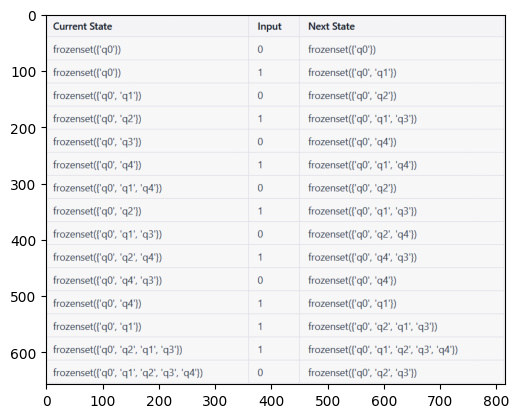

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('/content/Capture.PNG')
plt.imshow(img)
print('the string that passes through all the states of the DFA is 0101010110111101')